In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d rahuljaiswalonkaggle/soil-fertility-dataset

  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 40.2MB/s]


In [7]:
!unzip soil-fertility-dataset.zip

Archive:  soil-fertility-dataset.zip
  inflating: dataset1.csv            


In [8]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/dataset1.csv")

In [9]:
dataset.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datastandardized = scaler.fit_transform(dataset.drop(columns="Output"))


In [11]:
data_standardized=pd.DataFrame(datastandardized)
data_standardized

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.405879,-0.271559,0.483452,-0.108684,0.539450,0.097342,-0.372049,-0.121106,-1.232375,-0.391816,0.010125,-0.841681
1,-0.436196,-0.321661,-1.304676,0.235662,1.458073,0.524638,4.038050,-0.089413,-1.055427,1.261840,-1.344503,2.979688
2,-1.082651,-0.226012,1.756083,0.171097,-0.237846,0.583985,1.527686,-0.089413,-1.055427,1.326268,-1.388726,2.523929
3,-1.160226,-0.353544,-0.201192,0.278706,0.256797,0.382206,4.173745,-0.068284,-1.158379,1.240364,-1.400363,2.155815
4,0.300763,-0.212348,-0.450885,0.257184,-1.015142,0.287251,0.962288,-0.115824,-1.087599,1.583981,-1.451569,2.927101
...,...,...,...,...,...,...,...,...,...,...,...,...
875,1.348021,-0.175910,0.990893,0.967399,-0.237846,-0.389301,-0.068996,-0.057720,0.176781,-0.563624,0.550114,0.175013
876,0.223189,-0.253341,-0.112591,-0.582161,-0.520499,-0.614818,-0.819844,-0.063002,1.325339,-1.079049,-0.159786,-0.333334
877,0.378338,-0.244231,-1.046928,0.235662,0.539450,-0.151914,-0.204692,-0.026027,-0.183552,-0.692481,-0.508916,-0.473568
878,0.947219,-0.034714,-0.877780,-0.280858,0.751440,0.536508,-0.478344,0.058488,0.141391,0.145085,1.066827,-0.105454


In [12]:
import seaborn as sns

<Axes: >

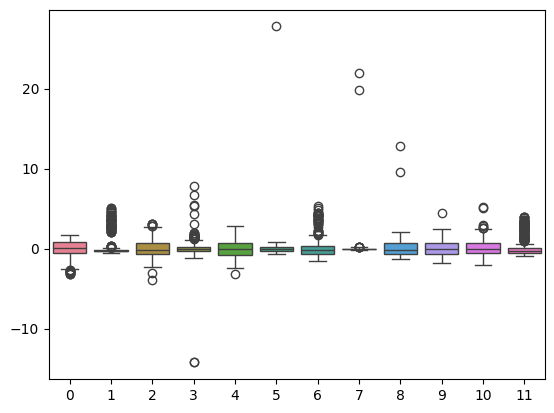

In [13]:
sns.boxplot(data_standardized)

In [14]:
def remove_outliers_fill_median(dataframe, columns):
    df_outliers_removed = dataframe.copy()

    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the upper and lower bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound) #filters data which are not in the threshold

        df_outliers_removed.loc[outliers_mask, column] = dataframe[column].median() #Replacing outliers with the median value of the column

    return df_outliers_removed

cleaned_data = remove_outliers_fill_median(data_standardized, pd.DataFrame(datastandardized).columns)
print(cleaned_data)


           0         1         2         3         4         5         6   \
0   -1.405879 -0.271559  0.483452 -0.108684  0.539450  0.097342 -0.372049   
1   -0.436196 -0.321661 -1.304676  0.235662  1.458073  0.524638 -0.204692   
2   -1.082651 -0.226012  1.756083  0.171097 -0.237846  0.583985  1.527686   
3   -1.160226 -0.353544 -0.201192  0.278706  0.256797  0.382206 -0.204692   
4    0.300763 -0.212348 -0.450885  0.257184 -1.015142  0.287251  0.962288   
..        ...       ...       ...       ...       ...       ...       ...   
875  1.348021 -0.175910  0.990893  0.967399 -0.237846 -0.389301 -0.068996   
876  0.223189 -0.253341 -0.112591 -0.582161 -0.520499 -0.614818 -0.819844   
877  0.378338 -0.244231 -1.046928  0.235662  0.539450 -0.151914 -0.204692   
878  0.947219 -0.034714 -0.877780 -0.280858  0.751440  0.536508 -0.478344   
879  0.223189 -0.194129 -0.201192 -0.044119  1.387409  0.310990  0.681851   

           7         8         9         10        11  
0   -0.121106 -1.23

<Axes: >

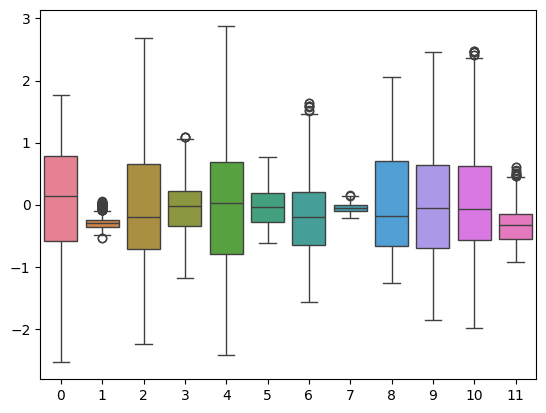

In [15]:
sns.boxplot(cleaned_data)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cleaned_data,dataset["Output"] , test_size=0.25, random_state=42,stratify=dataset["Output"])


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100}%')

Accuracy: 83.18181818181817%


In [21]:
conf_mat = confusion_matrix(y_test,y_pred)

<Axes: >

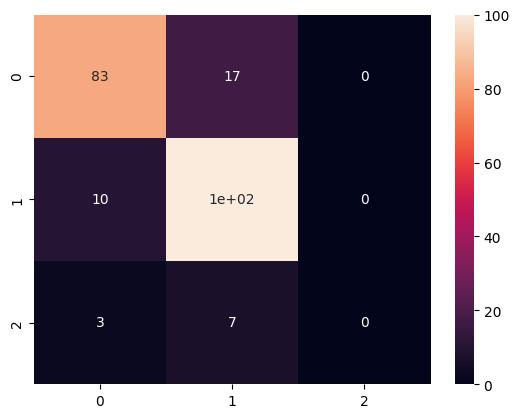

In [22]:
sns.heatmap(conf_mat,annot=True)

In [82]:
count = 0
for i in dataset["Output"]:
    if i==2:
        count+=1
print(dataset["Output"].shape)
print(f"amount of label 2 in whole data ={(count/880)*100}%")


(880,)
amount of label 2 in whole data =4.431818181818182%


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=8, min_samples_split=20,
                       random_state=42)

In [60]:
y_pred1 = random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred1)

print(f'Accuracy: {accuracy*100}%')

Accuracy: 86.36363636363636%


In [61]:
conf_mat1 = confusion_matrix(y_test,y_pred1)

<Axes: >

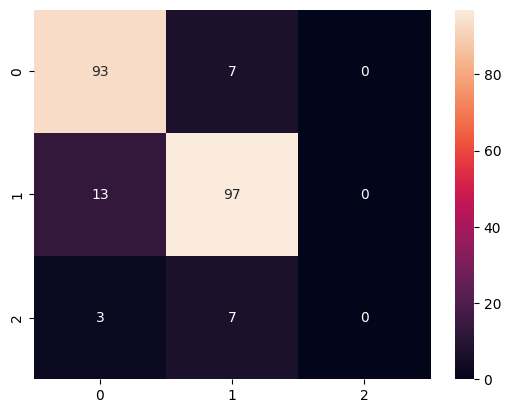

In [62]:
sns.heatmap(conf_mat1,annot=True)

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [66]:
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred2=dt_classifier.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred2)

0.8272727272727273

<Axes: >

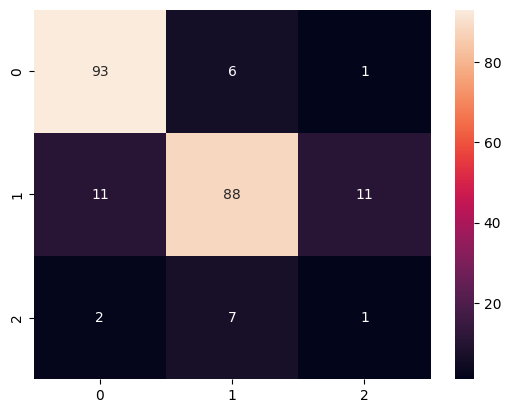

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

In [84]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [85]:
ANNmodel = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [86]:
ANNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
y_pred_proba = ANNmodel.predict(x_test)
y_pred3 = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)

7/7 [==============================] - 0s 3ms/step


In [90]:
print(accuracy3)

0.35909090909090907
